In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('C:/Users/zzaer/OneDrive/바탕 화면/2025 채린/아러다/train.csv')

In [3]:
train.head()

,id,bank_months_count,branch_application_count_8weeks,credit_risk_score,current_address_months_count,customer_age,date_of_birth_distinct_emails_4w,days_since_request,device_distinct_emails_8w,device_os,...,phone_mobile_valid,prev_address_months_count,requested_credit_limit,session_length_in_minutes,source,velocity_24h,velocity_4w,velocity_6h,zip_count_4w,fraud
0,0,6.0,17.0,123,194.0,30,6,0.01,1.0,windows,...,True,NaN,200.0,4.4,INTERNET,4427.34,5459.48,6941.09,1056,0
1,1,10.0,0.0,43,12.0,20,15,0.01,1.0,linux,...,True,28.0,500.0,6.2,INTERNET,5393.91,6632.77,7743.25,1839,0
2,2,NaN,1.0,-3,107.0,30,10,0.01,1.0,linux,...,False,NaN,200.0,4.2,INTERNET,3088.89,3074.85,3449.30,2184,0
3,3,21.0,32.0,37,38.0,30,6,0.02,1.0,linux,...,True,NaN,200.0,18.4,INTERNET,3661.14,5594.04,6210.46,1107,0
4,4,NaN,0.0,62,66.0,20,12,24.00,1.0,other,...,True,NaN,200.0,3.8,TELEAPP,4142.93,4790.72,2697.17,723,0


In [9]:
print(train.info())  # 데이터프레임의 정보(변수명, 데이터 타입, 결측치 여부)
print(train.shape)   # 데이터프레임의 행과 열의 크기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                700000 non-null  int64  
 1   bank_months_count                 522399 non-null  float64
 2   branch_application_count_8weeks   700000 non-null  float64
 3   credit_risk_score                 700000 non-null  int64  
 4   current_address_months_count      697024 non-null  float64
 5   customer_age                      700000 non-null  int64  
 6   date_of_birth_distinct_emails_4w  700000 non-null  int64  
 7   days_since_request                700000 non-null  float64
 8   device_distinct_emails_8w         699750 non-null  float64
 9   device_os                         700000 non-null  object 
 10  device_previously_fraudulent      700000 non-null  float64
 11  email_is_free                     700000 non-null  b

In [23]:
# 각 컬럼별 결측치 비율 계산
missing_ratio = train.isnull().mean().sort_values(ascending=False)

# 결측치 비율이 0보다 큰 컬럼만 추출
missing_ratio = missing_ratio[missing_ratio > 0]

# 보기 좋게 %로 표시
missing_ratio_percent = (missing_ratio * 100).round(2)
print(missing_ratio_percent)


initial_transfer_amount         74.24
prev_address_months_count       71.29
bank_months_count               25.37
current_address_months_count     0.43
session_length_in_minutes        0.20
device_distinct_emails_8w        0.04
dtype: float64


In [ ]:
# 결측치
# 수치형 변수 중 결측치가 있는 칼럼만 평균으로 채우기
for col in train.columns:
    if train[col].isnull().sum() > 0 and train[col].dtype in ['float64', 'int64']:
        train[col].fillna(train[col].mean(), inplace=True)


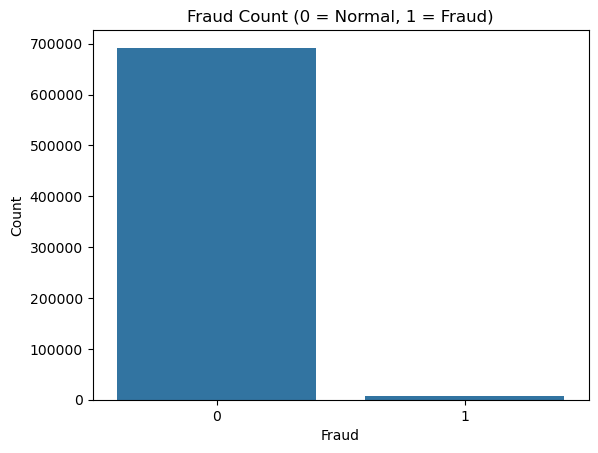

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 막대그래프
sns.countplot(x='fraud', data=train)
plt.title('Fraud Count (0 = Normal, 1 = Fraud)')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()


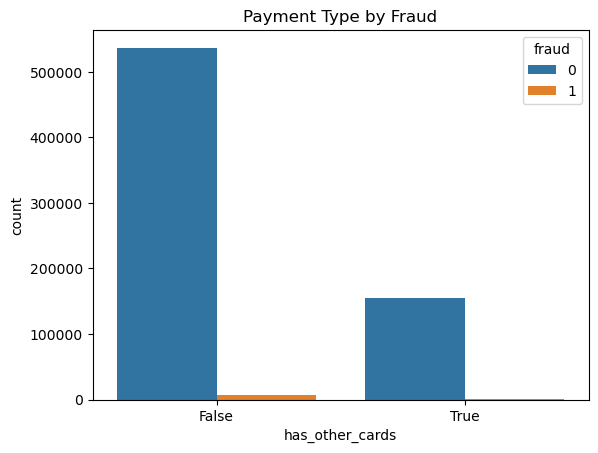

In [10]:
sns.countplot(x="has_other_cards", hue="fraud", data=train)
plt.title("Payment Type by Fraud")
plt.show()

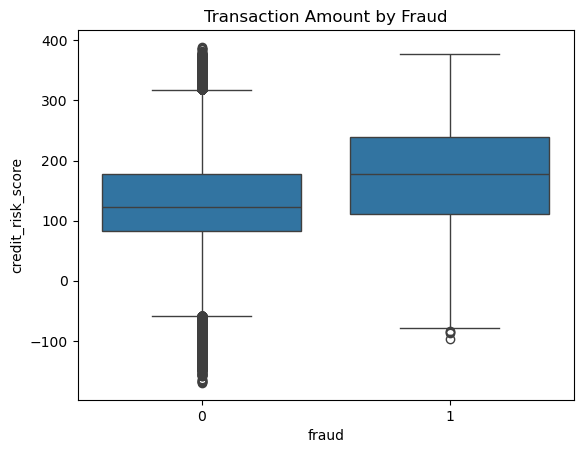

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: amount 변수의 fraud 여부에 따른 분포
sns.boxplot(x="fraud", y="credit_risk_score", data=train)
plt.title("Transaction Amount by Fraud")
plt.show()


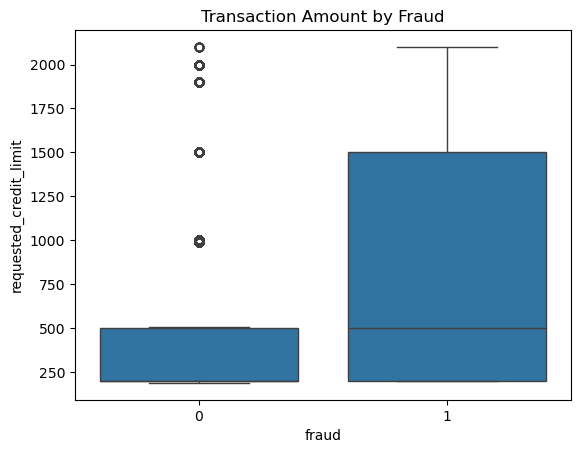

In [27]:
sns.boxplot(x="fraud", y="requested_credit_limit", data=train)
plt.title("Transaction Amount by Fraud")
plt.show()

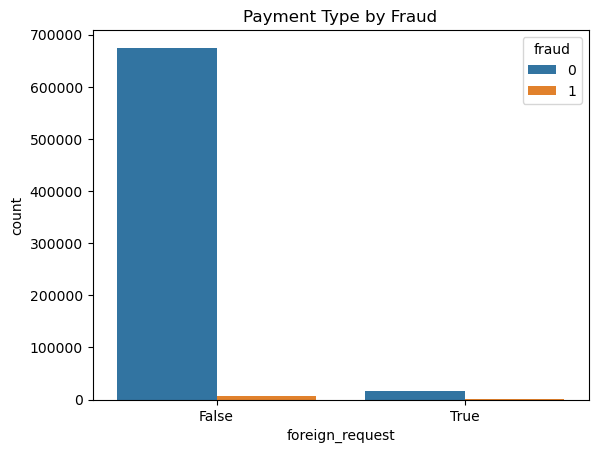

In [28]:

sns.countplot(x="foreign_request", hue="fraud", data=train)
plt.title("Payment Type by Fraud")
plt.show()

In [32]:
# 조건 필터링
foreign_true = train[train['foreign_request'] == True]

# fraud 비율 계산
fraud_rate = (foreign_true['fraud'].sum() / len(foreign_true)) * 100
print(f"Foreign Request = True인 사람 중 fraud 비율: {fraud_rate:.2f}%")

foreign_true = train[train['foreign_request'] == False]

# fraud 비율 계산
fraud_rate = (foreign_true['fraud'].sum() / len(foreign_true)) * 100
print(f"Foreign Request = True인 사람 중 fraud 비율: {fraud_rate:.2f}%")


Foreign Request = True인 사람 중 fraud 비율: 2.11%
Foreign Request = True인 사람 중 fraud 비율: 1.08%


In [14]:
# 수치형 칼럼만 선택
numeric_cols = train.select_dtypes(include=['number'])

# fraud와의 상관계수 계산
correlations = numeric_cols.corr()

# fraud 칼럼과 다른 변수들 간 상관계수만 추출
fraud_corr = correlations['fraud'].drop('fraud').sort_values(ascending=False)

print(fraud_corr)


credit_risk_score                   0.069580
requested_credit_limit              0.068094
customer_age                        0.062905
income                              0.045283
device_distinct_emails_8w           0.037704
current_address_months_count        0.033186
prev_address_months_count           0.021867
bank_months_count                   0.020829
initial_transfer_amount             0.014471
month                               0.011885
session_length_in_minutes           0.009253
zip_count_4w                        0.005462
days_since_request                  0.000927
id                                 -0.001204
velocity_24h                       -0.009582
velocity_4w                        -0.010162
branch_application_count_8weeks    -0.010753
velocity_6h                        -0.016291
name_email_similarity              -0.036804
date_of_birth_distinct_emails_4w   -0.042848
device_previously_fraudulent             NaN
Name: fraud, dtype: float64


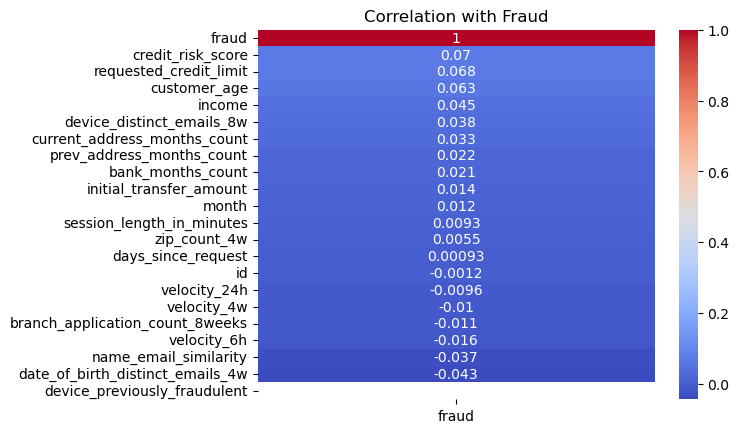

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵
sns.heatmap(numeric_cols.corr()[['fraud']].sort_values(by='fraud', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with Fraud")
plt.show()


In [7]:
fraud_cases = train[train['fraud'] == 1]
fraud_cases

,id,bank_months_count,branch_application_count_8weeks,credit_risk_score,current_address_months_count,customer_age,date_of_birth_distinct_emails_4w,days_since_request,device_distinct_emails_8w,device_os,...,phone_mobile_valid,prev_address_months_count,requested_credit_limit,session_length_in_minutes,source,velocity_24h,velocity_4w,velocity_6h,zip_count_4w,fraud
49,49,NaN,2.0,362,192.0,40,2,0.00,1.0,windows,...,True,NaN,1500.0,1.2,INTERNET,4442.85,5099.35,5530.57,1113,1
168,168,15.0,5.0,143,87.0,50,8,0.02,1.0,windows,...,True,NaN,200.0,4.0,INTERNET,4956.46,6336.17,7694.79,1594,1
268,268,NaN,1.0,76,77.0,40,3,0.01,1.0,linux,...,False,NaN,200.0,1.7,INTERNET,3132.41,4723.50,2292.53,811,1
478,478,28.0,18.0,248,148.0,30,22,0.89,1.0,macintosh,...,False,NaN,1500.0,11.4,INTERNET,4375.65,5514.35,6573.57,1671,1
518,518,25.0,4.0,256,49.0,50,5,0.00,1.0,windows,...,True,NaN,200.0,4.5,INTERNET,4533.29,4765.94,7266.21,2004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699475,699475,NaN,1.0,85,98.0,30,13,0.00,1.0,linux,...,True,NaN,200.0,2.9,INTERNET,3096.13,4913.50,5359.28,1272,1
699628,699628,NaN,1.0,278,241.0,40,5,0.04,1.0,windows,...,True,NaN,1500.0,5.3,INTERNET,6160.31,5543.77,1172.24,1153,1
699645,699645,NaN,0.0,155,197.0,70,6,0.02,1.0,windows,...,False,NaN,200.0,9.2,INTERNET,5494.36,4454.58,7854.50,1072,1
699812,699812,28.0,1.0,16,133.0,20,23,3.08,1.0,other,...,False,NaN,500.0,5.9,INTERNET,6331.10,5505.82,13778.43,1219,1
